### 3. Motion of Field in 1D, 2D: %matplotlib widget 방식

- 인터랙티브 애니메이션(%matplotlib widget)은 컴퓨터 부하를 상당히 많이 잡아먹습니다. 하고 나면 종료를 해야 합니다.
- %matplotlib widget으로 생성된 애니메이션은 셀 실행이 끝나도 백그라운드에서 계속 실행되며, 사용자가 직접 끄기 전까지 계속해서 컴퓨터 자원(CPU, 메모리)을 소모합니다.

In [ ]:
# 종료방식 1

# 코드 내의 FuncAnimation로 만들어진 ani 객체에 대해 ani.event_source.stop()

In [2]:
# 종료방식 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 'fig'는 이전에 plt.subplots()로 생성한 Figure 객체입니다.
# plt.close(fig)

# 만약 열려있는 모든 Figure를 닫고 싶다면:
plt.close('all')

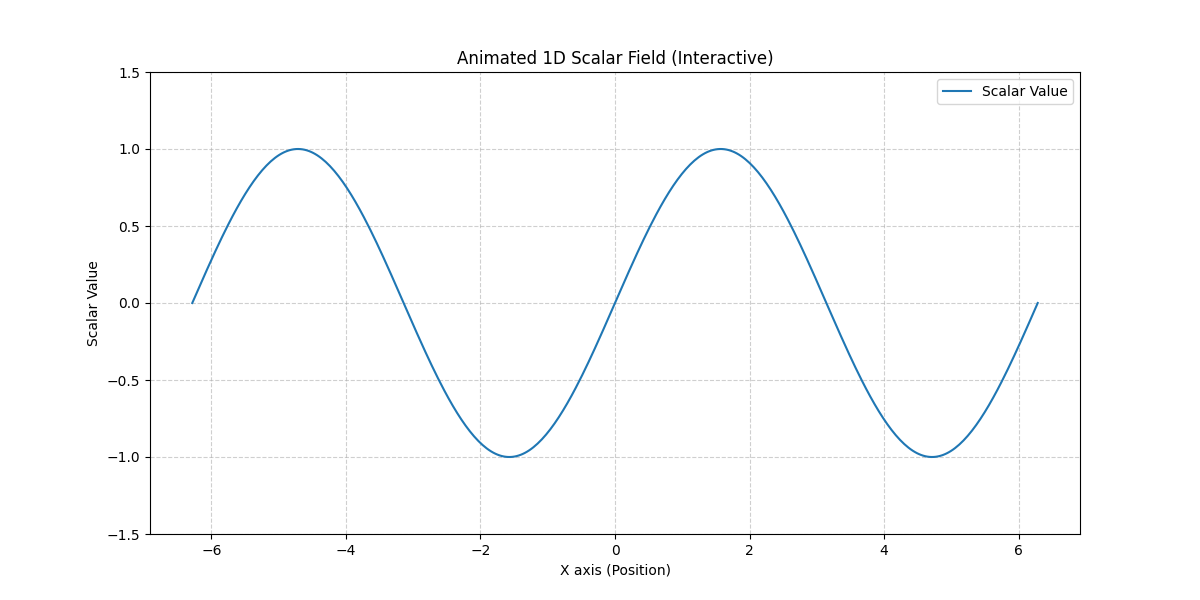

In [1]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# from IPython.display import HTML # << ipympl 사용 시 필요 없음

# ==============================================================================
# 단계 2: 공간 정의 (좌표 그리드 생성)
# ------------------------------------------------------------------------------
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# ==============================================================================
# 단계 3: 필드(함수) 정의
# ------------------------------------------------------------------------------
initial_scalar_field = np.sin(x)

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(-1.5, 1.5)

# ==============================================================================
# 단계 5: 필드 시각화 (데이터 플로팅)
# ------------------------------------------------------------------------------
line, = ax.plot(x, initial_scalar_field, label='Scalar Value')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ------------------------------------------------------------------------------
ax.set_xlabel('X axis (Position)')
ax.set_ylabel('Scalar Value')
ax.set_title('Animated 1D Scalar Field (Interactive)')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()
# plt.close() # << ipympl 사용 시 필요 없음

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 그래프를 업데이트하는 함수
def update(frame):
    t = frame * 0.1
    new_scalar_field = np.sin(x - t)
    line.set_ydata(new_scalar_field)
    return line,

# FuncAnimation 객체 생성
# FuncAnimation 객체를 변수에 할당해야 (ani = ...) 애니메이션이 실행됩니다.
ani = FuncAnimation(fig, update, frames=100, interval=20, blit=True)

# plt.show()를 호출하면 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

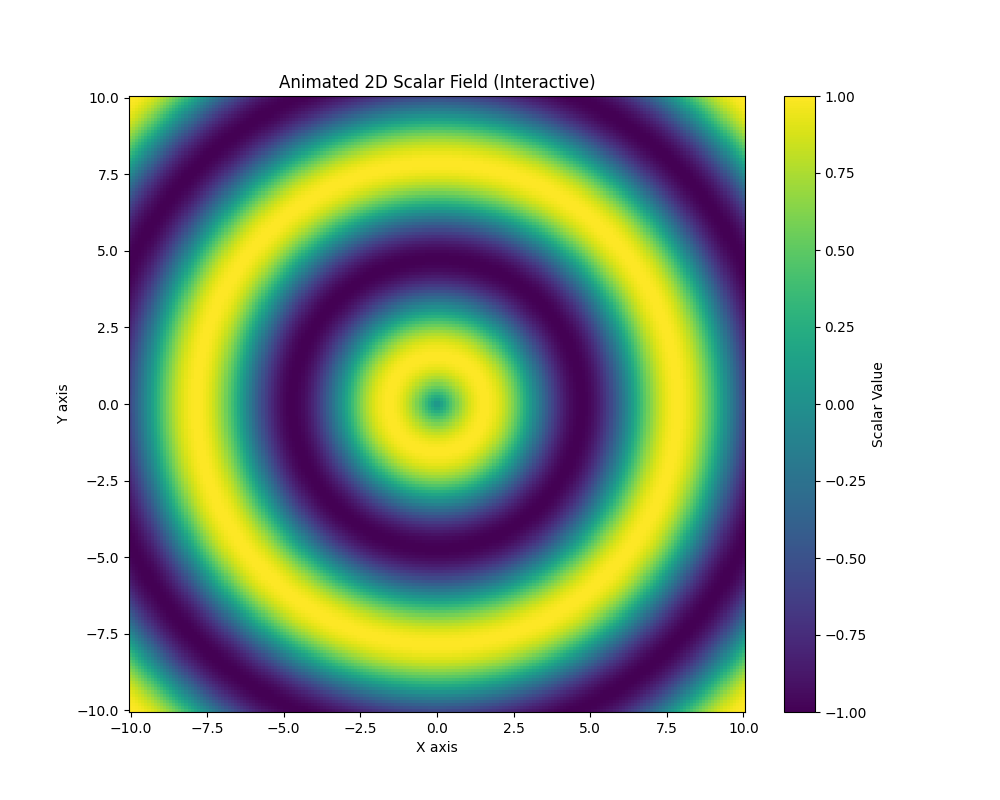

In [3]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# 이 셀을 실행하기 전에 ipympl이 설치되어 있어야 합니다 (pip install ipympl)
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# from IPython.display import HTML # << ipympl 사용 시 필요 없음

# ==============================================================================
# 단계 2: 공간 정의 (좌표 그리드 생성)
# ------------------------------------------------------------------------------
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# ==============================================================================
# 단계 3: 필드(함수) 정의
# ------------------------------------------------------------------------------
initial_scalar_field = np.sin(R)

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# ==============================================================================
# 단계 5: 필드 시각화 (초기 프레임 플로팅)
# ------------------------------------------------------------------------------
mesh = ax.pcolormesh(X, Y, initial_scalar_field, cmap='viridis', shading='auto')
# 색상 범위를 고정하여 애니메이션 동안 색상 기준이 변하지 않도록 합니다.
mesh.set_clim(-1, 1)

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 컬러바 등)
# ------------------------------------------------------------------------------
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Animated 2D Scalar Field (Interactive)')
ax.set_aspect('equal', adjustable='box')
fig.colorbar(mesh, ax=ax, label='Scalar Value')
# plt.close() # << ipympl 사용 시에는 이 줄을 사용하지 않습니다.

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출될 업데이트 함수
def update(frame):
    t = frame * 0.2
    new_scalar_field = np.sin(R - t)
    mesh.set_array(new_scalar_field.flatten())
    return mesh,

# FuncAnimation 객체를 변수에 할당해야 애니메이션이 정상적으로 실행됩니다.
ani = FuncAnimation(fig, update, frames=100, interval=30, blit=True)

# plt.show()를 호출하면 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

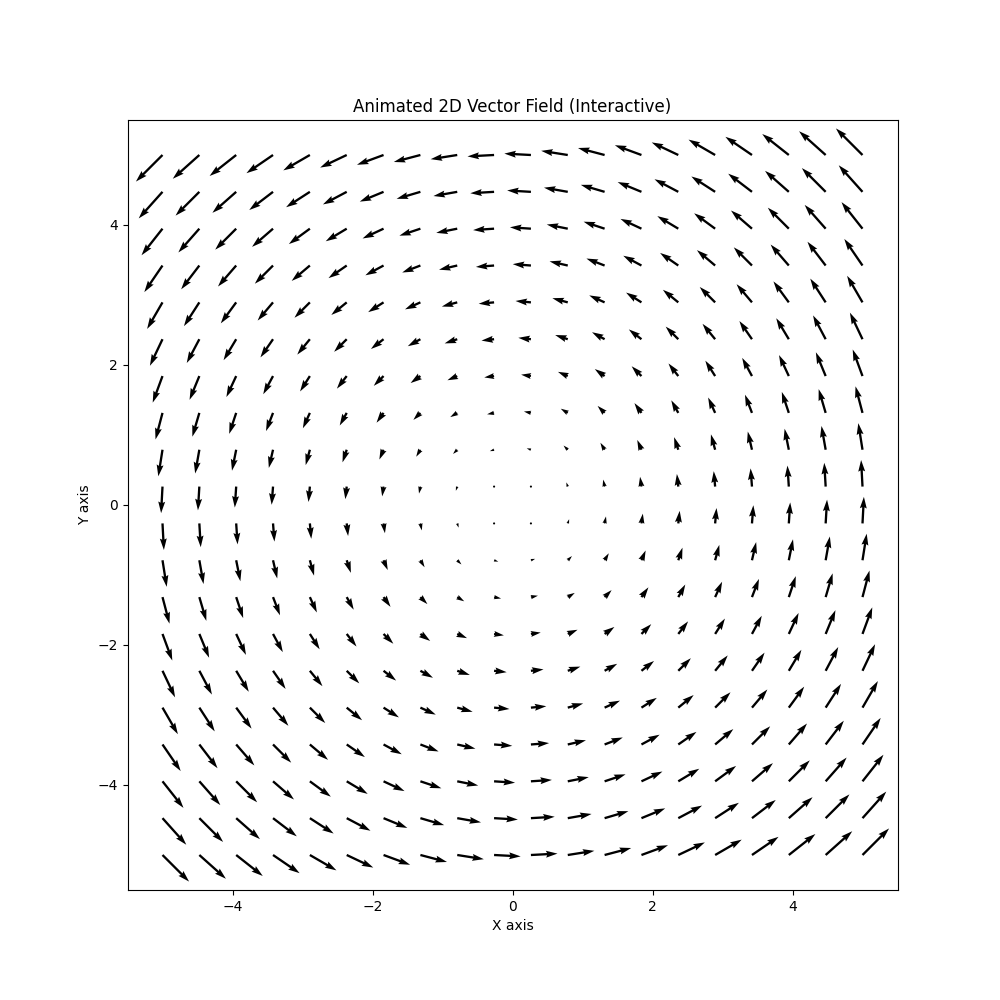

In [1]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# from IPython.display import HTML # << ipympl 사용 시 필요 없음

# ==============================================================================
# 단계 2: 공간 정의 (좌표 그리드 생성)
# ------------------------------------------------------------------------------
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

# ==============================================================================
# 단계 3: 필드(함수) 정의
# ------------------------------------------------------------------------------
# 첫 프레임(t=0)의 벡터 필드
U_initial = -Y
V_initial = X

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# ==============================================================================
# 단계 5: 필드 시각화 (초기 프레임 플로팅)
# ------------------------------------------------------------------------------
# 반환된 quiver 객체를 변수에 저장합니다.
quiver_plot = ax.quiver(X, Y, U_initial, V_initial)

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀 등)
# ------------------------------------------------------------------------------
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Animated 2D Vector Field (Interactive)')
ax.set_aspect('equal', adjustable='box')
# plt.close() # << ipympl 사용 시에는 이 줄을 사용하지 않습니다.

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출될 업데이트 함수
def update(frame):
    t = frame * 0.1
    # 시간에 따라 벡터의 크기가 주기적으로 변하도록 코사인 함수를 곱합니다.
    new_U = -Y * np.cos(t)
    new_V =  X * np.cos(t)
    # quiver 객체의 U, V 벡터 성분을 업데이트합니다.
    quiver_plot.set_UVC(new_U, new_V)
    return quiver_plot,

# FuncAnimation 객체를 변수에 할당해야 애니메이션이 정상적으로 실행됩니다.
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# plt.show()를 호출하면 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()


#  종료방법 2가지 중 하나.
# plt.close(fig)
# ani.event_source.stop()

In [4]:
plt.close(fig)